# Introduction to Machine Learning
In this tutorial, we will explore the following procedures in machine learning:
- data preparation and visualization
- data partition
- model training
- model evaluation
We will use scikit-learn and the Iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set) as an example. 

## Load packages

In [ ]:
# numpy is a workhorse class that lets you manipulate numerical data as matrices and vectors (n-dimensional 'arrays')
import numpy as np

# if you have mixed data like strings and numbers, use pandas instead of numpy
import pandas as pd

# scikit-learn is an important package for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# plotting
from matplotlib import pyplot as plt
import seaborn as sns

# helper module to make less output for repeated warnings
import warnings

In [ ]:
%config Completer.use_jedi = False

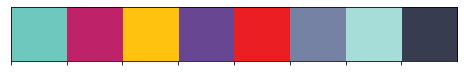

In [ ]:
# Create an array with the colors you want to use. These are ATOM theme colors
colors = [
    "#6EC8BE",
    "#BE2369",
    "#FFC30F",
    "#694691",
    "#EB1E23",
    "#7682A4",
    "#A7DDD8",
    "#373C50",
]
# Set your custom color palette
pal=sns.color_palette(colors)
sns.set_palette(pal)
sns.palplot(pal)

## Load the dataset

In [ ]:
iris_df = pd.read_csv("iris.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# convert class into integers

class_to_int = {
    "Iris-virginica": 0,
    "Iris-versicolor": 1,
    "Iris-setosa": 2
}
iris_df = iris_df.assign(class_int=iris_df["class"].apply(lambda x: class_to_int[x]))

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,class_int
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2


In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class_int
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Exploratory data analysis
- What kinds of data do we have? Continuous, categorical, ordinal?
- Which data are features (variables) and which data are classes (labels)?
- Which features separate the classes best?
- Based on what the labels are, do you think we are building a classification model or a regression model?

In [ ]:
sns.boxplot?

Signature:
sns.boxplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A 

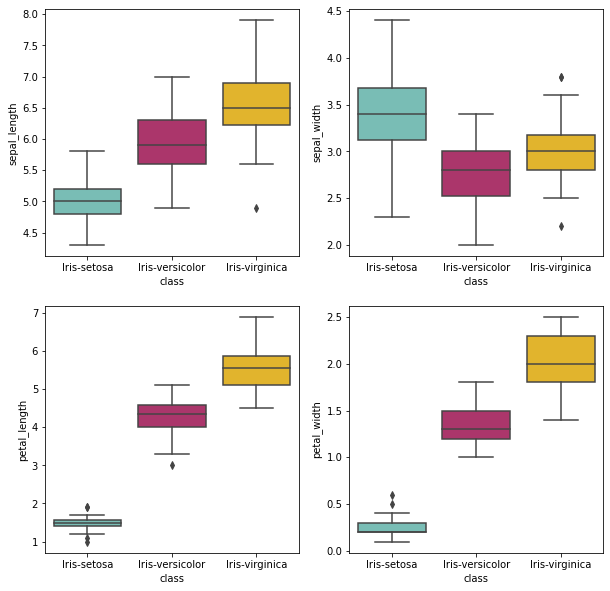

In [ ]:
# matplotlib.pyplot plotting syntax with seaborn plots in each subplot spot
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.boxplot(data=iris_df, x="class", y="sepal_length", ax=ax[0][0])
sns.boxplot(data=iris_df, x="class", y="sepal_width", ax=ax[0][1])
sns.boxplot(data=iris_df, x="class", y="petal_length", ax=ax[1][0])
sns.boxplot(data=iris_df, x="class", y="petal_width", ax=ax[1][1]);

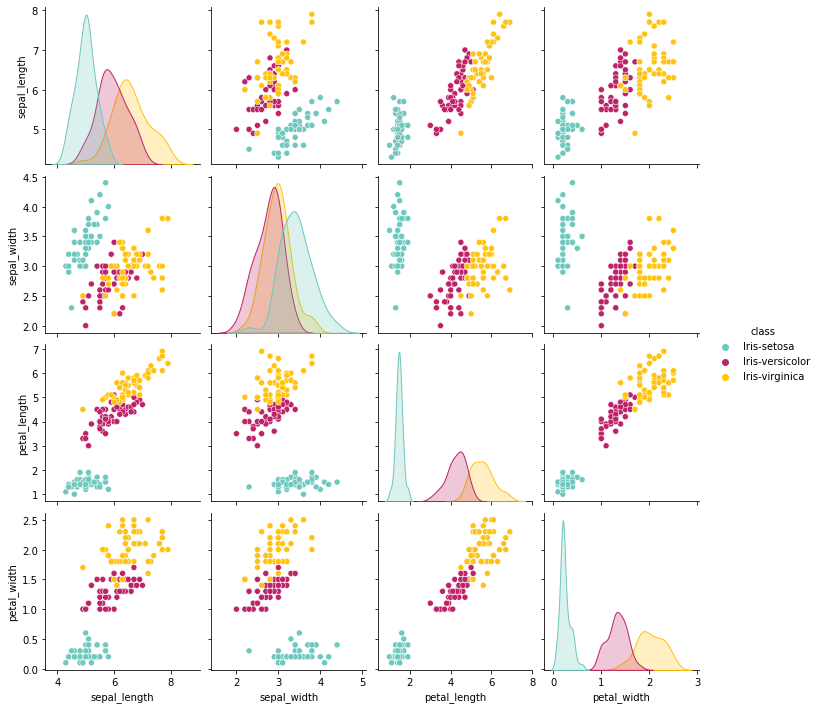

In [ ]:
# seaborn pairplot
sns.pairplot(data=iris_df.iloc[:, :-1], hue = 'class');

## Data splitting
- when you create a model, how would you test if it learned something?
- splitting the data into training and testing sets lets you train the model on some of the data, and then save the 'test' set for later
- it's important to remember that the test set represents brand new data your model has never seen before, so you have to make sure that no information 'leaks' from the test set into your training. Otherwise, your results will be over confident

In [ ]:
iris_df.shape

(150, 6)

In [ ]:
# convert dataframe into array
# split up into features (X) and labels (y)
# Capital X indicates a matrix(2D+) and little y indicates a vector (1D)

X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
y = iris_df["class_int"].values

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

X_train.shape, X_test.shape

((100, 4), (50, 4))

## Model training
- choose a model type
- 'fit' your model to the data

In [ ]:
from sklearn.svm import SVC #SVC is a type of model, or a 'class'

model = SVC() # this model is an object, which is an 'instance' of a class

model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Model evaluation
- numerical representations of how well your model fits your data
- there are several 'metrics' or scores you can choose from. They differ for regression and classification models

In [ ]:
?model.score

Signature: model.score(X, y, sample_weight=None)
Docstring:
Return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy
which is a harsh metric since you require for each sample that
each label set be correctly predicted.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True labels for X.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

Returns
-------
score : float
    Mean accuracy of self.predict(X) wrt. y.
File:      /opt/conda/envs/atomsci/lib/python3.6/site-packages/sklearn/base.py
Type:      method


In [ ]:
model.score(X_train, y_train)

0.98

In [ ]:
model.score(X_test, y_test)

0.98

## Model prediction
- you've built a model. now use it to make predictions on data, and visualize those predictions
- your model requires specific inputs for each prediction you want to make (a value for each feature)
- your model will give you an output (it's guess of the label for that input)

In [ ]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_test_pred

array([2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1,
       2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0])

In [ ]:
conf_mat_test = confusion_matrix(y_pred=y_test_pred, y_true=y_test)
conf_mat_train = confusion_matrix(y_pred=y_train_pred, y_true=y_train)

In [ ]:
conf_mat_test

array([[16,  0,  0],
       [ 1, 18,  0],
       [ 0,  0, 15]])

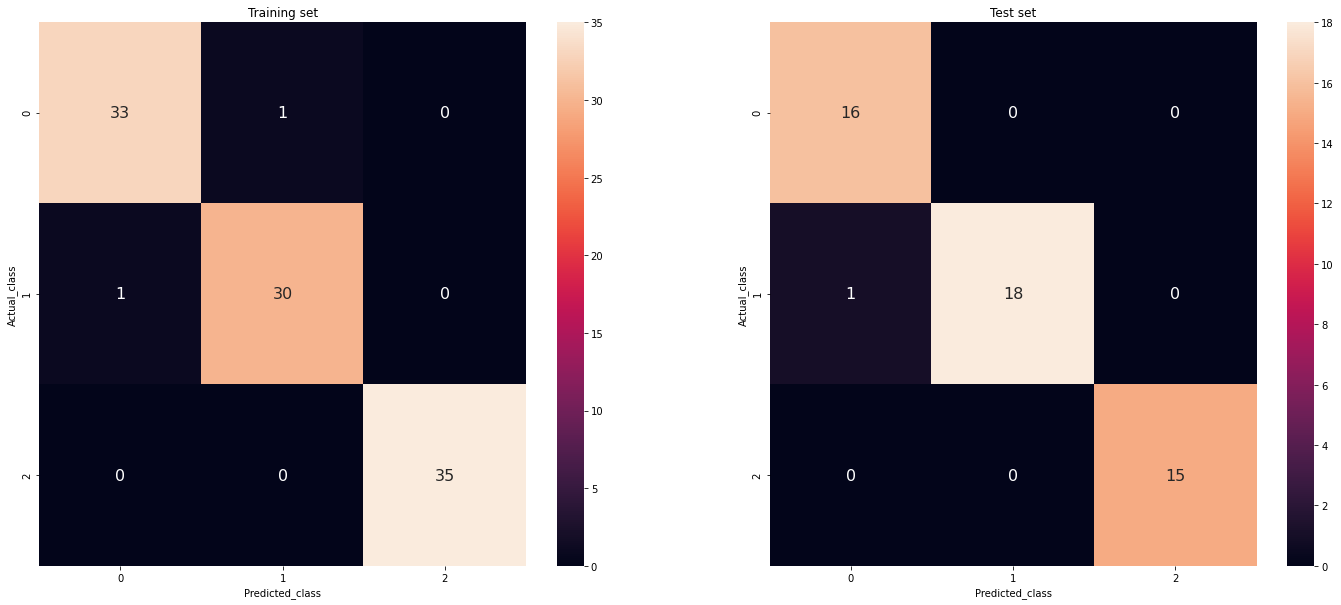

In [ ]:
df_cm_test = pd.DataFrame(conf_mat_test, range(len(conf_mat_test)), range(len(conf_mat_test[0])))
df_cm_train = pd.DataFrame(conf_mat_train, range(len(conf_mat_train)), range(len(conf_mat_train[0])))

fig, ax = plt.subplots(1,2,figsize=(24,10))
sns.heatmap(df_cm_train, annot=True, annot_kws={"size": 16}, ax=ax[0])
ax[0].set_xlabel("Predicted_class")
ax[0].set_ylabel("Actual_class")
ax[0].set_title("Training set")
sns.heatmap(df_cm_test, annot=True, annot_kws={"size": 16}, ax=ax[1])
ax[1].set_xlabel("Predicted_class")
ax[1].set_ylabel("Actual_class")
ax[1].set_title("Test set");

# In-class exercise #1
- Use scikit-learn's documentation to create a random forest model for predicting iris species from the measurements.
- the steps should be identical to the SVC model
- what are the scores for the random forest model? Which one did better? What is your rationale for that model type doing better?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()

In [ ]:
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model2.score(X_train, y_train)

1.0

In [ ]:
model2.score(X_test, y_test)

0.96

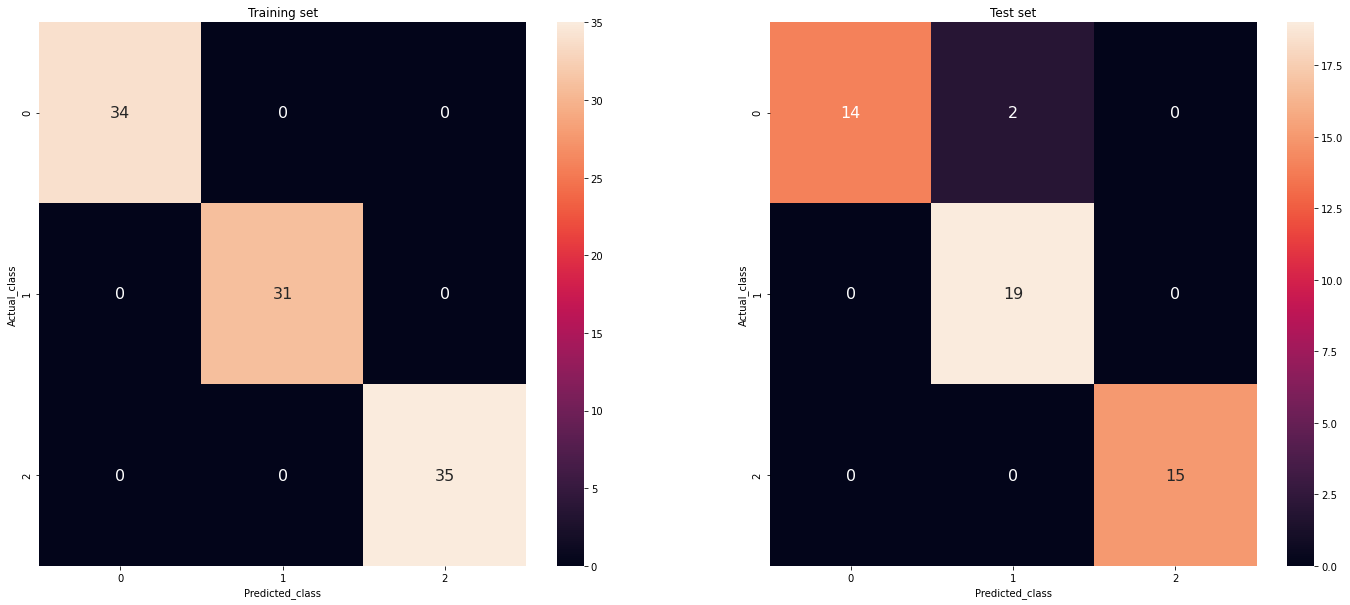

In [ ]:
y_test_pred = model2.predict(X_test)
y_train_pred = model2.predict(X_train)

conf_mat_test = confusion_matrix(y_pred=y_test_pred, y_true=y_test)
conf_mat_train = confusion_matrix(y_pred=y_train_pred, y_true=y_train)

df_cm_test = pd.DataFrame(conf_mat_test, range(len(conf_mat_test)), range(len(conf_mat_test[0])))
df_cm_train = pd.DataFrame(conf_mat_train, range(len(conf_mat_train)), range(len(conf_mat_train[0])))

fig, ax = plt.subplots(1,2,figsize=(24,10))
sns.heatmap(df_cm_train, annot=True, annot_kws={"size": 16}, ax=ax[0])
ax[0].set_xlabel("Predicted_class")
ax[0].set_ylabel("Actual_class")
ax[0].set_title("Training set")
sns.heatmap(df_cm_test, annot=True, annot_kws={"size": 16}, ax=ax[1])
ax[1].set_xlabel("Predicted_class")
ax[1].set_ylabel("Actual_class")
ax[1].set_title("Test set");

# Regression models
- diabetes data from https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

In [ ]:
diabetes = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep='\t') # read data
diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [ ]:
diabetes.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [ ]:
diabetes.columns = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu', 'y']     # rename columns
diabetes = diabetes[['sex', 'age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu', 'y']]   # rearrange columns
diabetes['sex'] = diabetes.sex-1  # cast sex as 0 and 1 instead of 1 and 2 b/c we are pythonic
diabetes.head()

,sex,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu,y
0,1,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,0,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,1,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,0,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,0,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


- What are the features? (inputs)
- What are the labels? (outputs)
- What kind of model would you build?

# EDA for diabetes dataset
- how can we plot distributions?
- what do you notice about the distributions & magnitudes of each feature?

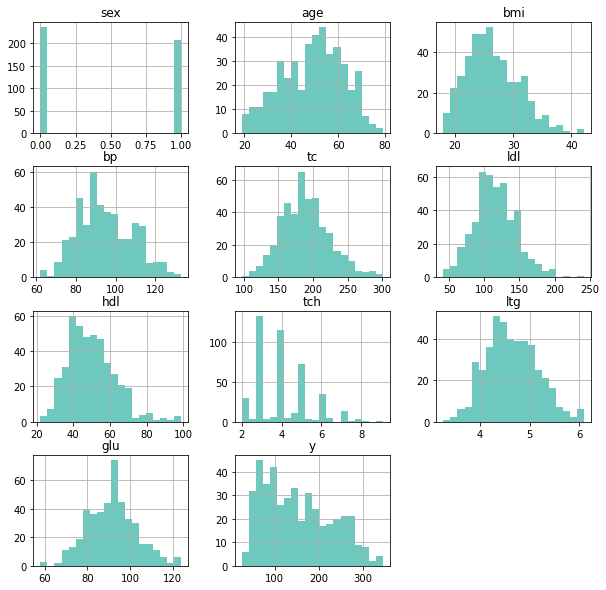

In [ ]:
# pandas histogram function
diabetes.hist(bins=20, figsize=(10,10));

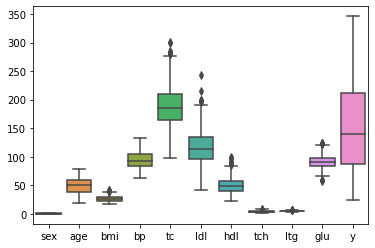

In [ ]:
# seaborn boxplot function
sns.boxplot(data=diabetes);

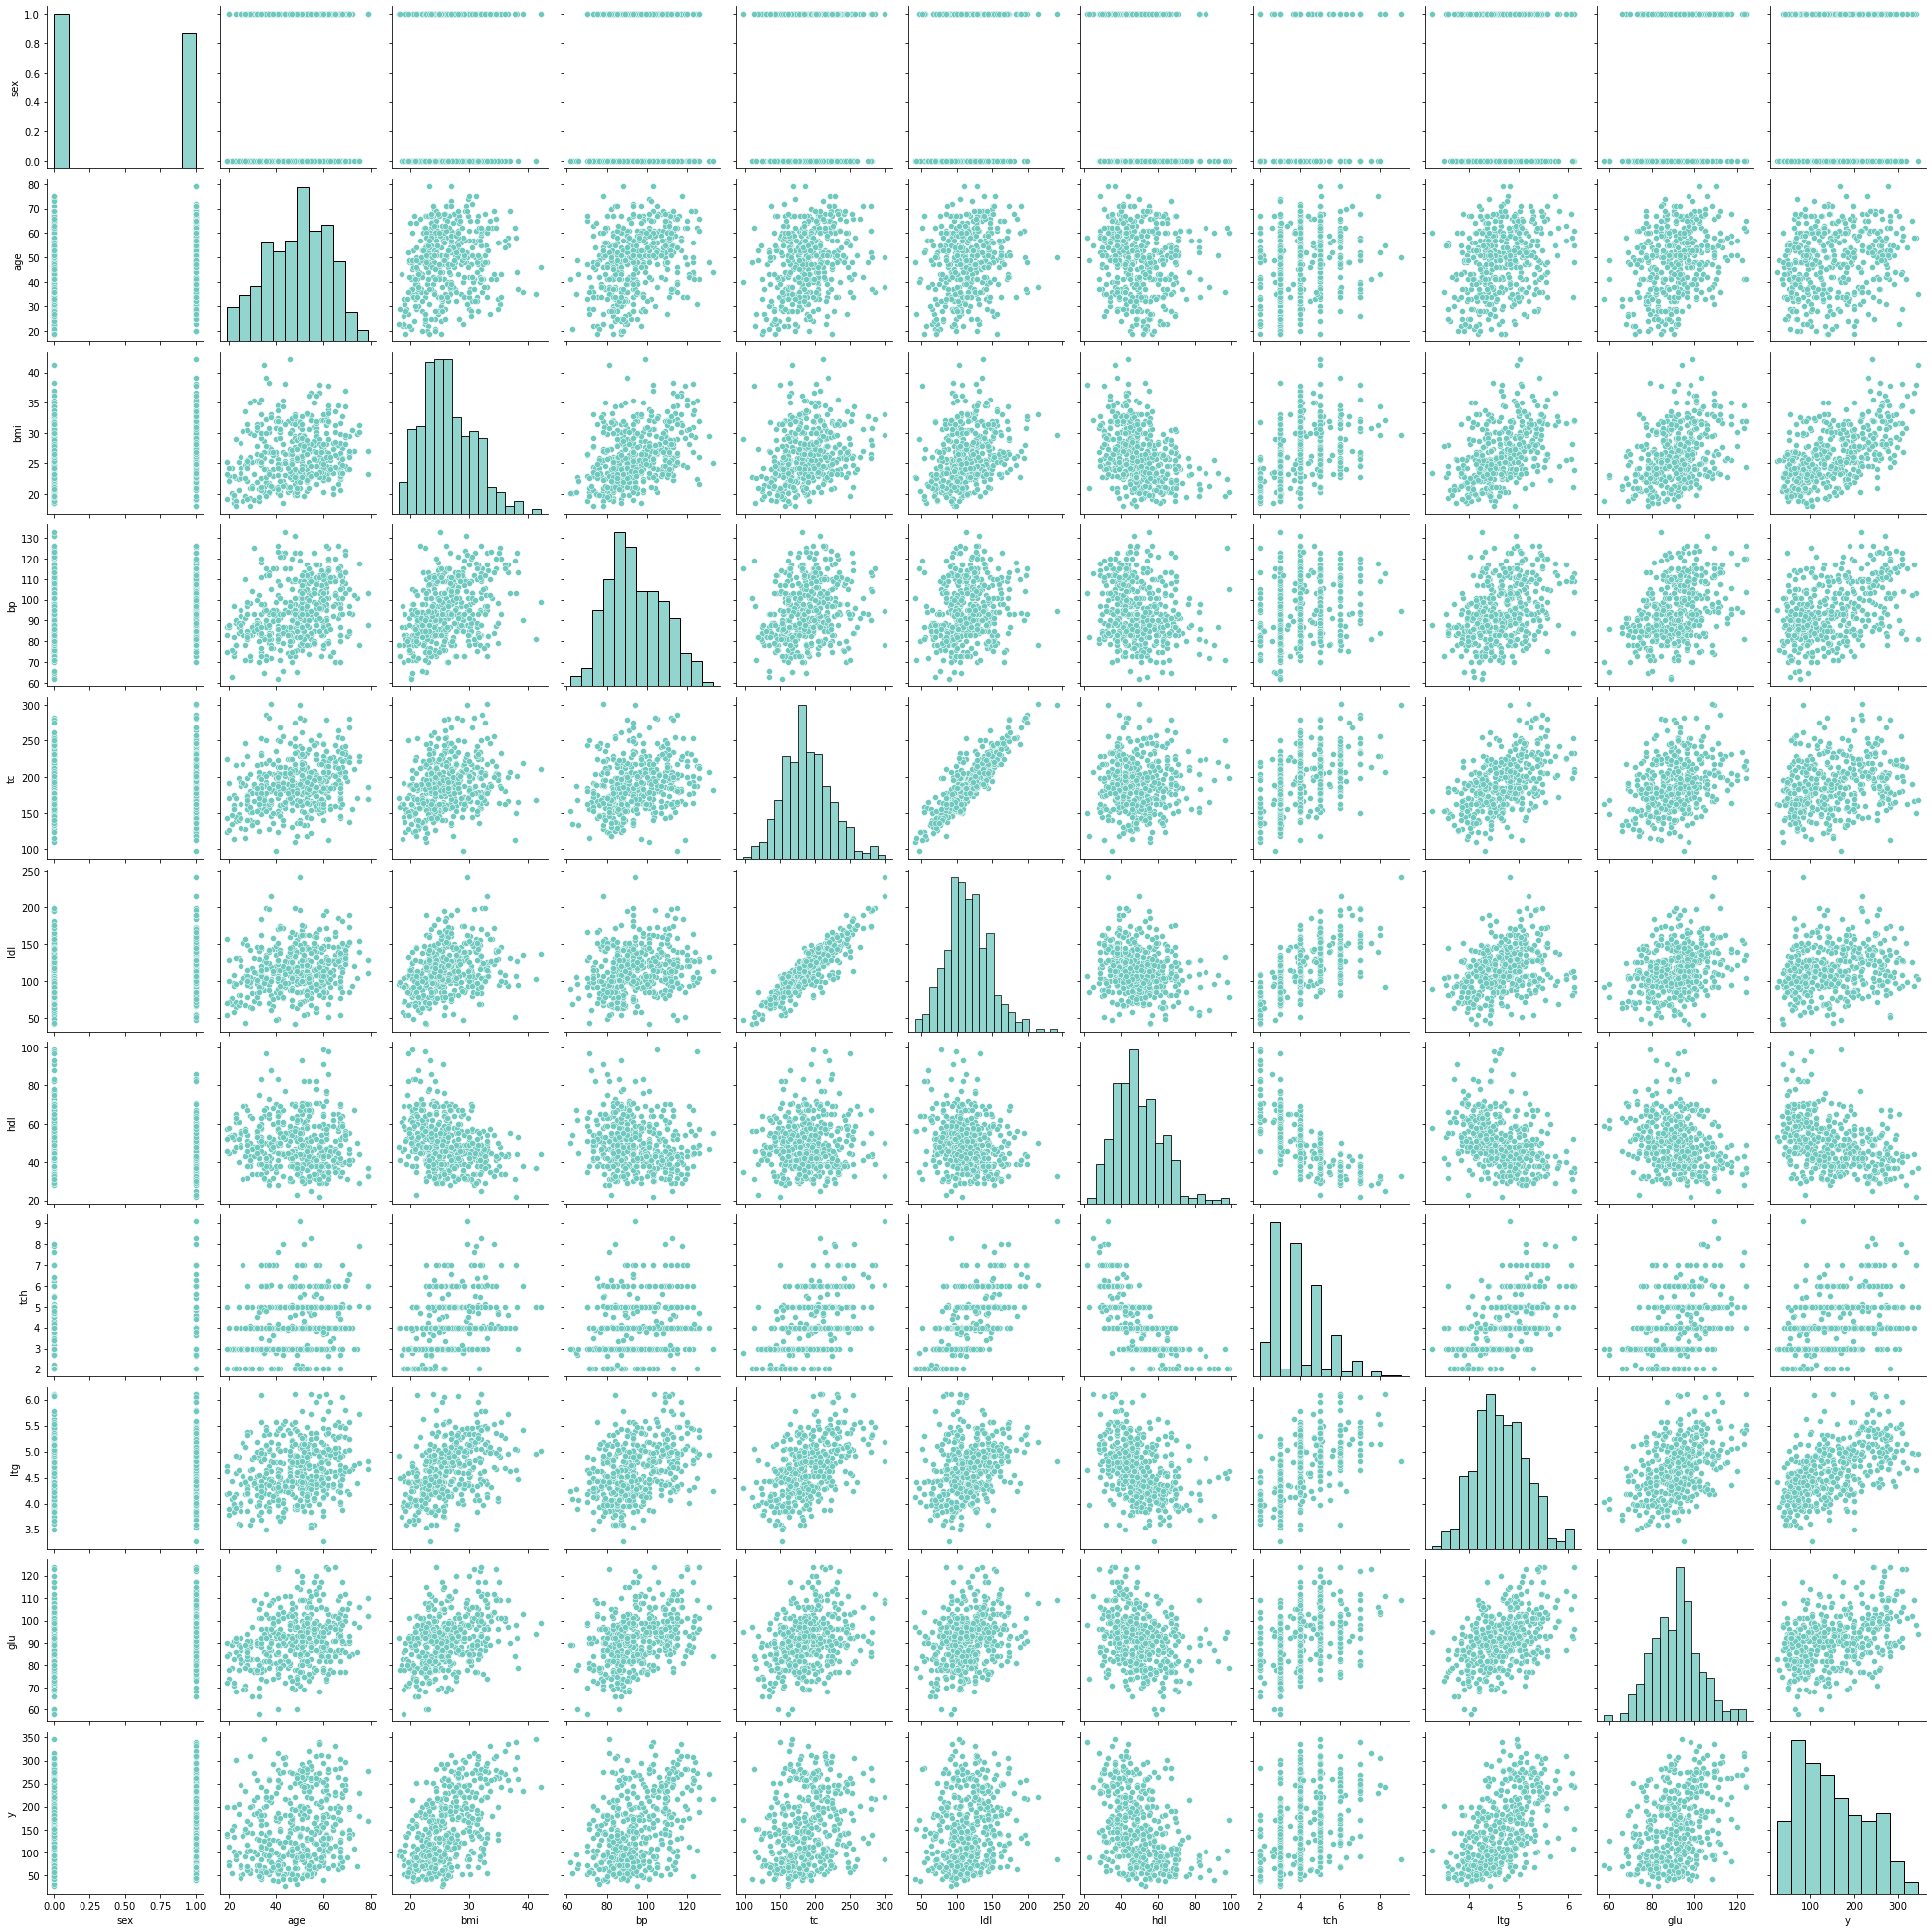

In [ ]:
# seaborn pairplot function
# is this helpful? What do we really want to know?

sns.pairplot(diabetes);

# with warnings.catch_warnings():
#     warnings.simplefilter('ignore')
#     sns.pairplot(diabetes, hue='y');


# sns.pairplot(diabetes, hue='y', diag_kind='hist', diag_kws={'hue':None});

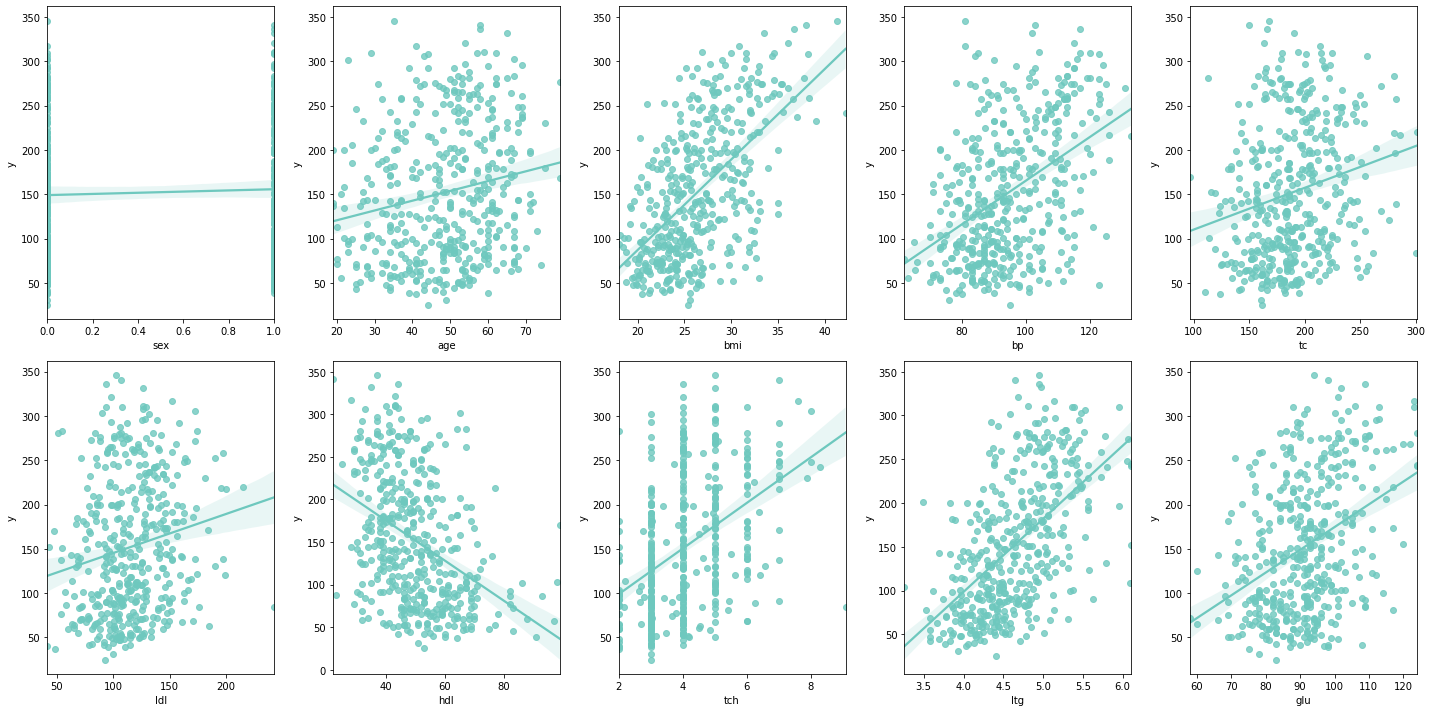

In [ ]:
# matplotlib functions
fig, ax = plt.subplots(2,5, figsize=(20,10)) # set up axes to be 2 rows and 5 columns
ax=ax.ravel() # flatten 2-D array into 1-D list
for i, col in enumerate(diabetes.columns[:-1]): # enumerate creates an 'iterator' that steps through a list and also returns the number of the position in the list
    sns.regplot(x=diabetes[col], y=diabetes['y'], ax=ax[i]) # create the plot with trendline - you only care about 'y' as the dependent variable
fig.tight_layout() # auto-fix spacing

# Data splitting

In [ ]:
diabetes.shape

(442, 11)

In [ ]:
X = diabetes[diabetes.columns[:-1]].to_numpy()
y = diabetes[diabetes.columns[-1]].values
print(X.shape, y.shape)

(442, 10) (442,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print(X_train.shape, X_test.shape)

(296, 10) (146, 10)


# Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
?model2.score

Signature: model2.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a
    precomputed kernel matrix or a list of generic objects instead,
    shape = (n_samples, n_samples_fitted),
    where n_samples_fitted is the number of
    samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True values for X.

sample_weight : array-like of shape (n_sampl

In [ ]:
print(model2.score(X_train, y_train), model2.score(X_test, y_test))

0.9232057509565816 0.39330452448272624


# Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
model=SVR()
model.fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.00041220959732468643 -0.019185234875099155


## wow, that's much worse than the random forest, what's going on?
- turns out, a support vector machine depends on the magnitude of the data
- if there are large differences between different features, the machine can misinterpret one feature as more important than the other
- same goes with the difference between the features and the response

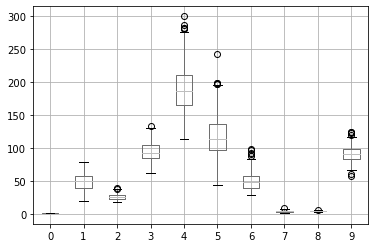

In [ ]:
pd.DataFrame(X_train).boxplot();

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [ ]:
X_train

array([[  0.    ,  57.    ,  26.9   , ...,   7.    ,   5.366 ,  96.    ],
       [  1.    ,  40.    ,  29.    , ...,   2.77  ,   4.3041,  95.    ],
       [  0.    ,  27.    ,  24.8   , ...,   3.    ,   4.1897,  69.    ],
       ...,
       [  0.    ,  48.    ,  22.8   , ...,   2.    ,   4.1271,  97.    ],
       [  1.    ,  69.    ,  24.5   , ...,   6.    ,   5.8081, 100.    ],
       [  0.    ,  61.    ,  25.8   , ...,   5.    ,   4.9972,  90.    ]])

In [ ]:
scaler.fit(X_train[:,1:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# only scale the non-categorical variables - slice the array
X_train_scaled = scaler.transform(X_train[:,1:])
X_test_scaled = scaler.transform(X_test[:,1:])
X_train_scaled.shape

(296, 9)

In [ ]:
X_train_scaled

array([[ 6.99709709e-01,  1.36214596e-01,  2.45367692e-01, ...,
         2.45633040e+00,  1.47184369e+00,  3.56840634e-01],
       [-6.18007078e-01,  6.08445454e-01,  1.46943303e+00, ...,
        -9.88629240e-01, -5.97784195e-01,  2.70049486e-01],
       [-1.62567286e+00, -3.36016262e-01, -2.58659212e-01, ...,
        -8.01314650e-01, -8.20748157e-01, -1.98652038e+00],
       ...,
       [ 2.09493925e-03, -7.85759936e-01,  4.61379223e-01, ...,
        -1.61572591e+00, -9.42754660e-01,  4.43631783e-01],
       [ 1.62986273e+00, -4.03477813e-01,  9.65406127e-01, ...,
         1.64191914e+00,  2.33349026e+00,  7.04005228e-01],
       [ 1.00976072e+00, -1.11144425e-01, -3.30663056e-01, ...,
         8.27507877e-01,  7.53057777e-01, -1.63906257e-01]])

In [ ]:
# put them back with the categorical ones - concatenate slices, be careful of shape
X_train_scaled = np.concatenate((X_train[:,0:1], X_train_scaled), axis=1) 
X_test_scaled = np.concatenate((X_test[:,0:1], X_test_scaled), axis=1) 
X_train_scaled.shape

(296, 10)

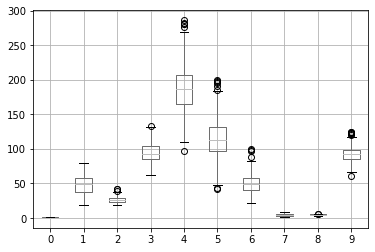

In [ ]:
pd.DataFrame(X_train).boxplot();

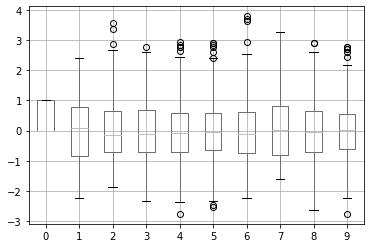

In [ ]:
pd.DataFrame(X_train_scaled).boxplot();

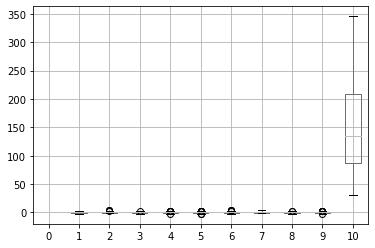

In [ ]:
pd.DataFrame(np.concatenate((X_train_scaled, y_train.reshape(-1,1)), axis=1)).boxplot();

In [ ]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

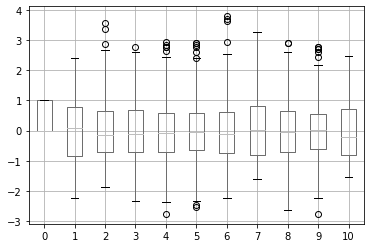

In [ ]:
pd.DataFrame(np.concatenate((X_train_scaled, y_train_scaled), axis=1)).boxplot();

# Model training and evaluation

In [ ]:
from sklearn.svm import SVR #SVC is a type of model, or a 'class'

model = SVR() # this model is an object, which is an 'instance' of a class

model.fit(X_train_scaled, y_train_scaled)

/opt/conda/envs/atomsci/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
?model.score

Signature: model.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a
    precomputed kernel matrix or a list of generic objects instead,
    shape = (n_samples, n_samples_fitted),
    where n_samples_fitted is the number of
    samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True values for X.

sample_weight : array-like of shape (n_sample

In [ ]:
print(model.score(X_train_scaled, y_train_scaled), model.score(X_test_scaled, y_test_scaled))

0.6929871339435552 0.3573223704535251


In [ ]:
# what's happening here?
y_train_pred = scaler_y.inverse_transform(model.predict(X_train_scaled))
y_test_pred = scaler_y.inverse_transform(model.predict(X_test_scaled))

In [ ]:
y_train_pred

array([200.98375825, 162.14026388, 107.7584858 ,  95.84940666,
        93.38328923,  79.90701269, 194.18557909, 157.62910679,
       147.70868214, 138.8428106 ,  74.43136387, 270.8643453 ,
       145.8231257 , 302.16687993, 174.58968033, 201.86228283,
       265.05459589, 237.09029833, 287.14879904, 249.85008213,
        85.14117841, 146.83327157,  69.71049902, 110.84161779,
       131.43984014,  58.12636775, 275.23525144, 170.67232146,
        74.03391938,  69.26123458, 194.18465062, 104.13705362,
       185.52262372, 147.86876993,  61.06161852, 128.32938722,
       105.56302227,  97.20469217,  64.78875229,  91.79067013,
       272.34579921, 127.64222434, 125.2116216 , 164.48820033,
        87.82950337, 165.8854616 , 200.83070505, 107.83186929,
       210.75865663, 239.86557995,  84.15528086, 151.26699728,
       106.13849805, 264.85899646, 172.14805735, 136.84866696,
       183.15118334, 200.19783938, 125.31413188,  76.76688513,
        95.28292858,  75.1383652 , 111.61196013, 198.16

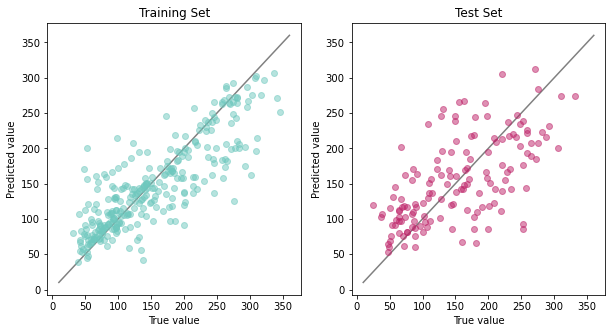

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot([10,360], [10,360], color='gray', zorder=0)
ax[0].scatter(x=y_train, y=y_train_pred, color=pal[0], alpha=0.5)
ax[0].set_xlabel("True value")
ax[0].set_ylabel("Predicted value")
ax[0].set_title('Training Set')

ax[1].plot([10,360], [10,360], color='gray', zorder=0)
ax[1].scatter(x=y_test, y=y_test_pred, color=pal[1], alpha=0.5)
ax[1].set_xlabel("True value")
ax[1].set_ylabel("Predicted value")
ax[1].set_title('Test Set');

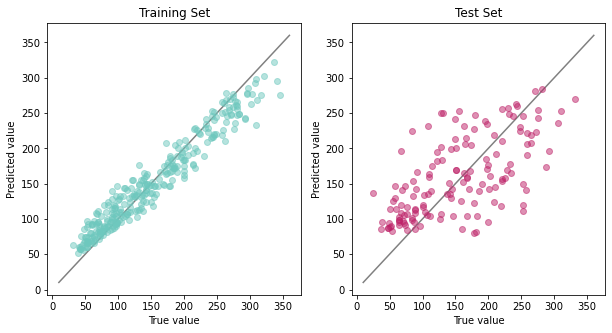

In [ ]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot([10,360], [10,360], color='gray', zorder=0)
ax[0].scatter(x=y_train, y=y_train_pred, color=pal[0], alpha=0.5)
ax[0].set_xlabel("True value")
ax[0].set_ylabel("Predicted value")
ax[0].set_title('Training Set')

ax[1].plot([10,360], [10,360], color='gray', zorder=0)
ax[1].scatter(x=y_test, y=y_test_pred, color=pal[1], alpha=0.5)
ax[1].set_xlabel("True value")
ax[1].set_ylabel("Predicted value")
ax[1].set_title('Test Set');

# fig.tight_layout()

# In-class exercise #2
### Question: does the random forest and SVR model come to the same exact guess every single time?
- write a for loop to train each regressor 100 times
- save the scores for the training sets and test sets in lists
- create a plot to show the variation in scores over multiple training runs
- extra credit: use subplots to draw two plots, or colors to draw the histograms on the same plot
- extra credit: if you wanted to visualize the training and testing scores together for each individual run, how could you plot this?

In [ ]:
train_score_list=[]
test_score_list=[]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

while i < 100:
    model2=RandomForestRegressor()
    model2.fit(X_train, y_train)
    score_train=model2.score(X_train, y_train)
    train_score_list.append(score_train)
    score_test=model2.score(X_test, y_test)
    test_score_list.append(score_test)
    i=i+1

In [ ]:
train_score_list=[]
test_score_list=[]

for i in range(100):
    model2=RandomForestRegressor()
    model2.fit(X_train, y_train)
    score_train=model2.score(X_train, y_train)
    train_score_list.append(score_train)
    score_test=model2.score(X_test, y_test)
    test_score_list.append(score_test)

In [ ]:
print(len(train_score_list))
train_score_list[0:5]

100


[0.9223881034194129,
 0.9192198114483371,
 0.9203628181475249,
 0.9229153829740091,
 0.9231449637802295]

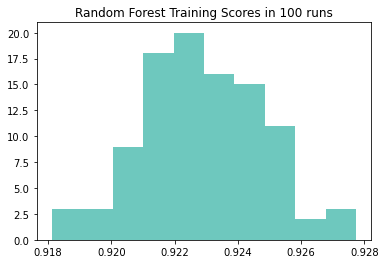

In [ ]:
plt.hist(train_score_list)
plt.title('Random Forest Training Scores in 100 runs');

In [ ]:
model2.score(X_test, y_test)

0.3941312775077019

In [ ]:
model2.score(X_train, y_train)

0.9221300429512878

In [ ]:
model.score(X_train_scaled, y_train_scaled)

0.6929871339435552

In [ ]:
# use SCALED data to get a good model for SVR
train_score_list=[]
test_score_list=[]
for i in range(100):
    model2=SVR()
    model2.fit(X_train_scaled, y_train_scaled)
    score_train=model2.score(X_train_scaled, y_train_scaled)
    train_score_list.append(score_train)
    score_test=model2.score(X_test_scaled, y_test_scaled)
    test_score_list.append(score_test)

/opt/conda/envs/atomsci/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/atomsci/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/atomsci/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/atomsci/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [ ]:
print(len(train_score_list))

train_score_list[0:5]

100


[0.6929871339435552,
 0.6929871339435552,
 0.6929871339435552,
 0.6929871339435552,
 0.6929871339435552]

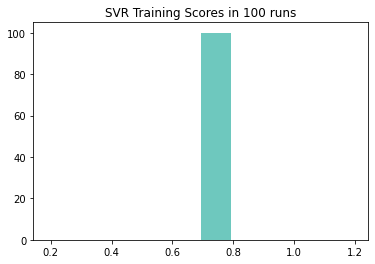

In [ ]:
plt.hist(train_score_list)
plt.title('SVR Training Scores in 100 runs');